In [1]:
import state_utils

host = "an"
state_utils.set_host(host)
state_utils.set_midas_db_type("standard")
state_utils.set_cohort("Poyet")

'Poyet'

In [2]:
from parse_midas_data import parse_good_species_list
import config
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import Roodgar_metadata
from scipy.interpolate import interp1d
from random import shuffle
import seaborn as sns

In [3]:
good_species = parse_good_species_list()

In [4]:
dates = config.dates
hc_samples = Roodgar_metadata.highcoverage_samples
#dates = dates.loc[all_sxamples]
all_samples = config.host_samples

In [5]:
if config.cohort == "Roodgar":
    pi_dir = "%s/pi/%s" % (config.analysis_directory,config.cohort)
else:
    pi_dir = "%s/pi/%s/%s" % (config.analysis_directory,config.cohort,host)

In [27]:
pi_df_BT = pd.DataFrame(columns=all_samples,index=good_species)
pi_df_W = pd.DataFrame(columns=all_samples,index=good_species)

for species in good_species:
    try:
        pi_df = pd.read_csv("%s/%s_pi.txt" % (pi_dir,species),index_col=0)
        pi_df_T = pd.DataFrame(columns=all_samples,index=all_samples)
        pi_df_T.loc[pi_df.index,pi_df.columns] = pi_df
        species_dates = dates.loc[pi_df.index].sort_values()
        first_date = species_dates.index[0]
        pi_df_BT.loc[species] = pi_df_T.loc[first_date]
        pi_df_W.loc[species] = np.diag(pi_df_T)
        
    except:
        pass
    

In [28]:
#[d for d in dates.index if d in pi_df_W.columns]
pi_df_W = pi_df_W.loc[:,[d for d in dates.index if d in pi_df_W.columns]]
pi_df_BT = pi_df_BT.loc[:,[d for d in dates.index if d in pi_df_BT.columns]]
#pi_df_BT = pi_df_BT[[d for d in dates.index if d in pi_df_BT.index]]

In [29]:
pi_df_W = pi_df_W.loc[pi_df_W.T.notna().sum() > 25]
pi_df_BT = pi_df_BT.loc[pi_df_W.index]

In [9]:
if host == "ae":
    pi_df_W = pi_df_W.drop(pi_df_W.mean().idxmax(),axis=1)

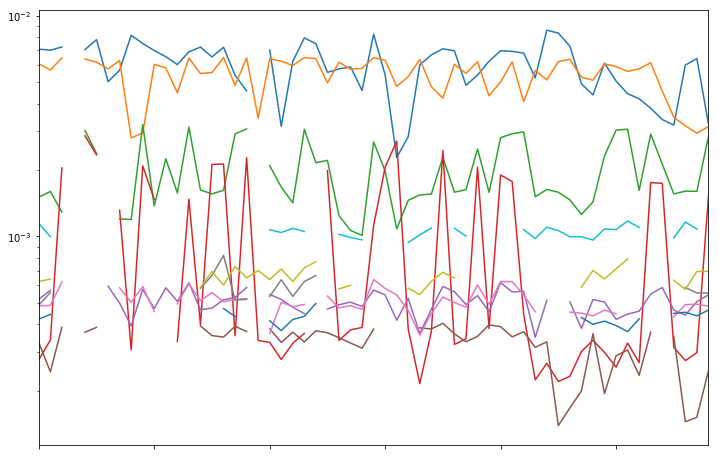

In [10]:
fig,ax = plt.subplots(figsize=(12,8))
pi_df_W.T.rolling(1).mean().plot(ax=ax,legend=None)
ax.set_xticklabels([])
ax.semilogy();
#fig.legend(loc="upper right");

In [ ]:
fig,ax=plt.subplots(figsize=(12,8))
sns.boxplot(data=all_arr,ax=ax, showfliers=False)
for x in range(len(all_arr)):
    ax.plot(np.ones(len(all_arr[x]))*x, all_arr[x], 'r.', alpha=0.2)
ax.set_ylim([5*1e-5,5*1e-2])

ax.semilogy();

In [11]:
oligospecies=np.logical_and(pi_df_W.notna().T.sum() > 15,pi_df_W.T.mean() > 1e-3)

In [12]:
#pi_df_W.T.mean().sort_values()

In [13]:
Fst = (pi_df_BT - pi_df_W)/pi_df_BT

In [14]:
#pi_df_W = pi_df_W[hc_samples] 
#pi_df_BT = pi_df_BT[hc_samples] 

In [15]:
#data_perc_BT = 1 - pi_df_BT.isna().sum()/pi_df_BT.shape[0]

#pi_df_BT = pi_df_BT[data_perc_BT.loc[data_perc_BT > .1].index]

In [16]:
import matplotlib
from matplotlib import cm

#normalize item number values to colormap
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)

#colormap possible values = viridis, jet, spectral
rgba_color = cm.viridis(norm(np.linspace(0,1,20))) 
rgba_color = [r for r in rgba_color]

In [17]:
shuffle(rgba_color)

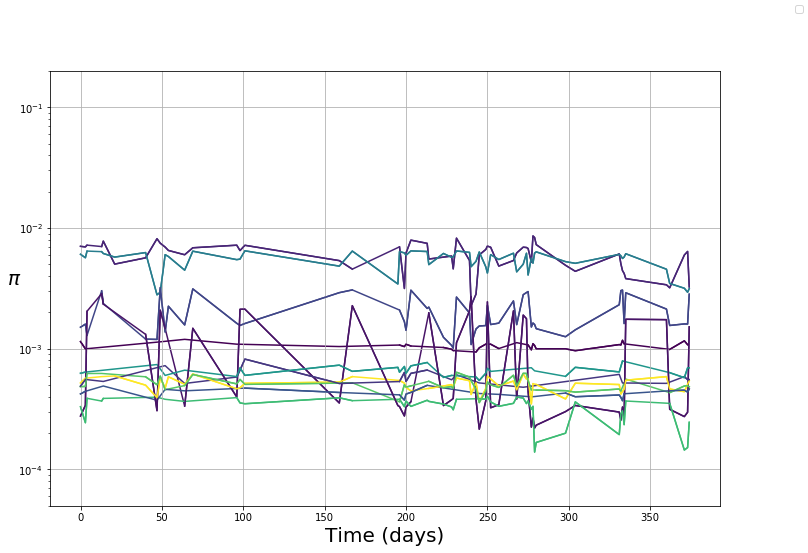

In [18]:
fig,ax = plt.subplots(figsize=(12,8))
#ax.plot(dates.loc[pi_df_W.columns],np.abs(pi_df_W.T.rolling(3).mean().values),"o-",zorder=10,cmap="viridis")
ax.semilogy()

ax.set_ylabel(r"$\pi$",size=20,rotation=0)
ax.set_xlabel("Time (days)",size=20)

i=0
roll_per = 1
for species in pi_df_W.index:
#for species in ["Bacteroides_fragilis_54507"]:
    nonNApoints=pi_df_W.T.rolling(roll_per).mean().T.loc[species][pi_df_W.T.rolling(roll_per).mean().T.loc[species].isna() == False]
    ax.plot(dates.loc[nonNApoints.index],nonNApoints.values,zorder=1,alpha=1,ls="-",color=rgba_color[i])
    ax.plot(dates.loc[pi_df_W.columns],pi_df_W.T.rolling(roll_per).mean()[species].values,"-",zorder=10,color=rgba_color[i])
    i+=1
# if config.host == "alien":
    
#     #ax.axvspan(60,392,color="red",alpha=.2)
    
#     ax.axvspan(376,392,color="red",alpha=.5)
    
#     #ax.axvspan(630,773,color="orange",alpha=.2)

#     ax.axvspan(630,637,color="orange",alpha=.5)


        
# if config.cohort == "Roodgar":
    
#     ax.axvspan(36,57,color="orange",alpha=.2)
    
#     ax.axvspan(57,70,color="red",alpha=.2)
    
ax.grid(True)

ax.set_ylim(.5*1e-4,2*1e-1)

fig.legend()
#fig.savefig("%s/pi_figs/%s.png" % (config.analysis_directory,(config.cohort+"_"+host)))

In [ ]:
pi_df_BT.T.rolling(2).mean().plot(color="grey",legend=None,logy=True,ylim=[1e-4,1e-2]);

In [ ]:
d=pi_df_W.iloc[10].values
d[~np.isnan(list(d))]

In [ ]:
all_arr = [pi_df_W.loc[d][~np.isnan(list(pi_df_W.loc[d]))].values for d in pi_df_W.T]

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))

#ax.plot(dates.loc[pi_df_BT.columns],np.abs(pi_df_BT.T.values),zorder=10)
ax.semilogy()

ax.set_ylabel(r"$\pi_{BT}$",size=40,rotation=0)
ax.set_xlabel("Days",size=40)
i=0
for species in pi_df_BT.index:
    nonNApoints=pi_df_BT.loc[species][pi_df_BT.loc[species].isna() == False]
    ax.plot(dates.loc[nonNApoints.index],nonNApoints.values,color="k",zorder=1,ls="--",alpha=.2)
    ax.plot(dates.loc[pi_df_BT.columns],pi_df_BT.T.rolling(roll_per).mean()[species].values,"-",zorder=10,color=rgba_color[i])
    i+=1
if config.host == "alien":
    
    #ax.axvspan(60,392,color="red",alpha=.2)
    
    ax.axvspan(376,392,color="red",alpha=.5)
    
    #ax.axvspan(630,773,color="orange",alpha=.2)

    ax.axvspan(630,637,color="orange",alpha=.5)

      
if config.cohort == "Roodgar":
    
    ax.axvspan(36,57,color="orange",alpha=.2)
    
    ax.axvspan(57,70,color="red",alpha=.2)
    
ax.grid(True)

#ax.set_ylim(.5*1e-4,2*1e-1)

#fig.savefig("%s/pi_figs/%s.png" % (config.analysis_directory,(config.cohort+"_"+host)))

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))

ax.plot(dates.loc[Fst.columns],Fst.T.values,zorder=10)
#ax.semilogy()

ax.set_ylabel(r"$F_{ST}$",size=40,rotation=0)
ax.set_xlabel("Days",size=40)

for species in pi_df_W.index:
    nonNApoints=Fst.loc[species][Fst.loc[species].isna() == False]
    ax.plot(dates.loc[nonNApoints.index],nonNApoints.values,color="k",zorder=1,ls="--",alpha=.2)

if config.host == "alien":
    
    #ax.axvspan(60,392,color="red",alpha=.2)
    
    ax.axvspan(376,392,color="red",alpha=.5)
    
    #ax.axvspan(630,773,color="orange",alpha=.2)

    ax.axvspan(630,637,color="orange",alpha=.5)


        
if config.cohort == "Roodgar":
    
    ax.axvspan(36,57,color="orange",alpha=.2)
    
    ax.axvspan(57,70,color="red",alpha=.2)
    
ax.grid(True)

#ax.set_ylim(.9,1.01)

#fig.savefig("%s/pi_figs/%s.png" % (config.analysis_directory,(config.cohort+"_"+host)))

In [ ]:
(pi_df_W/pi_df_BT).T.plot(cmap="viridis",legend=None,figsize=(12,8));

In [25]:
BH = {}
for species in pi_df_W.index:
    pi_df_BH = pd.read_csv("/u/home/r/rwolff/diversity_ecology/analysis/pi/HMP1-2/%s/%s_pi.txt" % (species,species),index_col=0)
    xz = zip(np.triu_indices(n=pi_df_BH.shape[0],m=pi_df_BH.shape[1])[0],(np.triu_indices(n=pi_df_BH.shape[0],m=pi_df_BH.shape[1])[1]))
    BH[species] = np.diag(pi_df_BH.values).mean()/pi_df_BH.values[xz].ravel().mean()


In [32]:
pi_df_W

,SRR9224203,SRR9224313,SRR9224314,SRR9224321,SRR9224184,SRR9224323,SRR9224322,SRR9224325,SRR9224324,SRR9224327,...,SRR9224282,SRR9224283,SRR9224242,SRR9224241,SRR9224240,SRR9224238,SRR9224237,SRR9224236,SRR9224235,SRR9224234
Bacteroides_vulgatus_57955,0.00705107,0.00697159,0.0072105,NaN,0.00701697,0.00778596,0.00502193,0.00566034,0.00814896,0.00748021,...,0.00609361,0.00505152,0.00443209,0.00420495,0.00380822,0.00338444,0.00319576,0.00597092,0.00639282,0.0032521
Eubacterium_rectale_56927,0.00605828,0.00566858,0.00643927,NaN,0.00636666,0.0061506,0.00574066,0.00625859,0.00279572,0.00293705,...,0.0060475,0.00588337,0.00559146,0.00574262,0.00612065,0.00455587,0.00347132,0.00316858,0.0029363,0.00314397
Bacteroides_uniformis_57318,0.00150678,0.00159894,0.00128884,NaN,0.00302162,0.00237324,NaN,0.00120044,0.00119418,0.00321122,...,0.0023144,0.00302889,0.00306137,0.00161601,0.00290794,0.00213013,0.00155828,0.00160443,0.00160094,0.00282849
Bacteroides_xylanisolvens_57185,0.000277002,0.000339515,0.00204241,NaN,0.00285714,0.00233995,NaN,0.00131509,0.000306557,0.0020865,...,0.000298691,0.000256063,0.000329232,0.00026827,0.00175381,0.00174072,0.000315025,0.000274154,0.000297777,0.00151657
Bacteroides_massiliensis_44749,0.000520442,0.00057012,NaN,NaN,0.000587322,NaN,0.000595274,0.000499097,0.000393383,0.000575594,...,0.000504993,0.000421247,0.000444935,0.000458908,0.000548464,0.00058734,0.000464369,0.000440725,0.000506423,0.000544098
Bacteroides_clarus_62282,0.000330703,0.000243861,0.000388406,NaN,0.000368579,0.000387703,NaN,NaN,0.00039693,NaN,...,0.000194401,0.000288139,0.000306274,0.000235023,0.00036892,NaN,0.000352816,0.00014486,0.000151841,0.000245662
Paraprevotella_clara_33712,0.000485732,0.00048702,0.000623416,NaN,0.00062395,NaN,NaN,0.000585415,0.000503411,0.000593296,...,0.000463823,0.000446531,NaN,NaN,0.000560473,NaN,0.000432745,0.000491256,0.000493788,0.000483712
Ruminococcus_bicirculans_59300,0.000489562,0.000556698,NaN,NaN,NaN,0.000535635,NaN,NaN,0.000697478,NaN,...,0.000613064,NaN,0.000520267,NaN,NaN,0.000516478,NaN,0.000587488,0.000554766,0.000554965
Alistipes_putredinis_61533,0.000625984,0.000640315,NaN,NaN,NaN,NaN,NaN,NaN,0.000739485,NaN,...,0.000642537,0.000712987,0.00079175,NaN,NaN,NaN,0.000633417,0.000575613,0.000693962,0.000695355
Bacteroides_ovatus_58035,0.0011457,0.000997628,NaN,NaN,NaN,NaN,NaN,NaN,0.00113358,NaN,...,0.00108208,0.00107421,0.00117473,0.00109832,NaN,NaN,0.000986993,0.00116214,0.00108011,NaN


In [20]:
pi_df_W = pi_df_W.loc[pi_df_W.loc[pi_df_W.T.notna().sum() > 100].index]
pi_df_BT = pi_df_BT.loc[pi_df_W.index]

In [30]:
BHT = ((pi_df_BT - pi_df_W)/pi_df_BT).T/(1-pd.Series(BH).T)
BHT = BHT.mask(BHT<=0)

In [31]:
BHT

,Bacteroides_vulgatus_57955,Eubacterium_rectale_56927,Bacteroides_uniformis_57318,Bacteroides_xylanisolvens_57185,Bacteroides_massiliensis_44749,Bacteroides_clarus_62282,Paraprevotella_clara_33712,Ruminococcus_bicirculans_59300,Alistipes_putredinis_61533,Bacteroides_ovatus_58035,Bacteroides_intestinalis_61596
SRR9224203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR9224313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR9224314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR9224321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR9224184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR9224323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR9224322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR9224325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR9224324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR9224327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[]

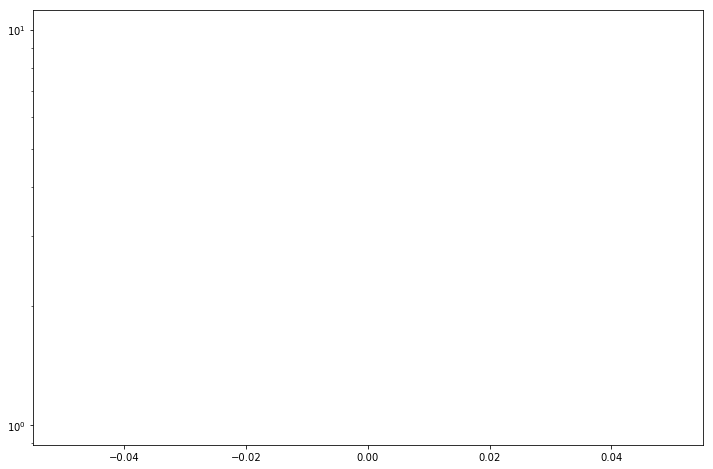

In [24]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(BHT.fillna(method='ffill', limit=2).rolling(2).mean().fillna(method="ffill").values);
ax.semilogy()
#ax.set_ylim([5*1e-2,1])
#ax.axhline(np.diag(pi_df_BH.values).mean()/pi_df_BH.values[xz].ravel().mean())

In [ ]:
species="Faecalibacterium_prausnitzii_61481"
pi_df_BH = pd.read_csv("/u/home/r/rwolff/diversity_ecology/analysis/pi/HMP1-2/%s/%s_pi.txt" % (species,species),index_col=0)

In [ ]:
xz = zip(np.triu_indices(n=pi_df_BH.shape[0],m=pi_df_BH.shape[1])[0],(np.triu_indices(n=pi_df_BH.shape[0],m=pi_df_BH.shape[1])[1]))

In [ ]:
BH = np.diag(pi_df_BH.values).mean()/pi_df_BH.values[xz].ravel().mean()
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(((pi_df_W/pi_df_BT).loc[species].values)/BH,"o")
#ax.axhline(np.diag(pi_df_BH.values).mean()/pi_df_BH.values[xz].ravel().mean())

In [ ]:
np.diag(pi_df_BH.values).mean()/pi_df_BH.values[xz].ravel().mean()

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))

lb = np.logspace(-2.5,-1.5,40)
ax.hist(pi_df_BH.values[xz].ravel(),bins=lb,density=True)

lb = np.logspace(-4.5,-1.5,120)

ax.hist(np.diag(pi_df_BH.values),bins=lb,density=True,alpha=.4)

ax.semilogx();